<h3>University of Arkansas MEEG 5523 - Design Problem 3.20</h3>
<h4>Andrew Cox, Student ID: 010960557</h4>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

<h3>Part A - Transfer ellipse; line of apsides; eccentricity; semi-major axis</h3>

In [2]:
#function to calculate orbital elements of transfer orbit
def classical(Le, Lm, L_A, r1, r2, s_u):
    theta_1 = Le-L_A #true anomaly angle
    theta_2 = Lm-L_A
    e = (r2-r1)/((r1*math.cos(math.radians(theta_1))-(r2*math.cos(math.radians(theta_2))))) #eccentricity
    Rp = (r1*(1+e*math.cos(math.radians(theta_1))))/(1+e) #pariapsis radius
    a = Rp/(1-e)
    Ra = a*(1+e)
    n = math.sqrt(s_u/a**3)
    T_R_1 = math.radians(theta_1) #convert to radians
    T_R_2 = math.radians(theta_2) #convert to radians
    E_e = math.acos((e+math.cos(T_R_1))/(1+e*math.cos(T_R_1))) #Eccentric anomaly of earth - use radians!!!
    E_m = math.acos((e+math.cos(T_R_2))/(1+e*math.cos(T_R_2))) #Eccentric anomaly of mars -use radians!!!
    t_e = ((E_e-e*math.sin(E_e))/n) #Time since periapsis earth (radians)
    t_m = ((E_m-e*math.sin(E_m))/n) #Time since periapsis mars (radians)
    t_t = abs(t_m-t_e)
    
    s = (
        f"Line of Apsides: {L_A} ""\n"
        f"Theta Earth: {theta_1} ""\n"
        f"Theta Mars: {theta_2} ""\n"
        f"Eccentricity: {e} ""\n"
        f"Pariapsis Radius(Km): {Rp} ""\n"
        f"Semi-Major Axis(Km): {a} ""\n"
        f"Mean Motion: {n} ""\n"
        f"Apoapsis Radius(km): {Ra} ""\n"
        f"E of Earth (Rad): {E_e} ""\n"
        f"E of Mars (Rad): {E_m} ""\n"
        f"Time since periapsis Earth (sec): {t_e} ""\n"
        f"Time since periapsis Mars (sec): {t_m} ""\n"
        f"Time delta (days): {t_t/60/60/24} ""\n"
    )
    
    print(s) 
    
    return theta_1, theta_2, e, Rp, a, n, E_e, t_e, E_m, t_m,

In [3]:
#TOF = 200 days
Le = 181.44 #earth longitude at launch
Lm = 333.221 #mars longitude at launch
L_A = 166 #Arbitrary line of apsides for testing purposes
r1 = 149905909.7 #earth radius(units - Km)
r2 = 206671197  #mars radius (units - Km)
s_u = 132712439935.5 #standard gravitaional parameter of the sun


classical(Le, Lm, L_A, r1, r2, s_u) #execute function

Line of Apsides: 166 
Theta Earth: 15.439999999999998 
Theta Mars: 167.221 
Eccentricity: 0.1640388502630138 
Pariapsis Radius(Km): 149143501.477836 
Semi-Major Axis(Km): 178409608.5383396 
Mean Motion: 1.5287217917912887e-07 
Apoapsis Radius(km): 207675715.59884325 
E of Earth (Rad): 0.22875661090182522 
E of Mars (Rad): 2.878831224562419 
Time since periapsis Earth (sec): 1253060.321038305 
Time since periapsis Mars (sec): 18552901.162651394 
Time delta (days): 200.22963937052188 



(15.439999999999998,
 167.221,
 0.1640388502630138,
 149143501.477836,
 178409608.5383396,
 1.5287217917912887e-07,
 0.22875661090182522,
 1253060.321038305,
 2.878831224562419,
 18552901.162651394)

<h3>Part B - Inclination of Transfer Ellipse - ecliptic plane</h3>

In [41]:
def transferinc(i_m, A_n, Le, Lm):
    alpha = 180-i_m
    a = (A_n+180)-Le
    b = Lm-(A_n+180)
    c1 = (math.cos(math.radians(a))) * (math.cos(math.radians(b))) + (math.sin(math.radians(a))) * (math.sin(math.radians(b))) * (math.sin(math.radians(alpha)))
    c = math.degrees(math.acos(c1))
    i_t = math.degrees(math.asin(((math.sin(math.radians(alpha)))*(math.sin(math.radians(b))))/(math.sin(math.radians(c)))))
    
    print("Inclination Transfer Plane (i_t): ", i_t)
    return c1, b, i_t, alpha, a, c

In [42]:
i_m = 1.8497 #Mars orbital plane inclination
A_n = 49.572 #Mars longitude of ascending node
Le = 181.44 #earth longitude at launch
Lm = 333.221 #mars longitude at launch

transferinc(i_m, A_n, Le, Lm)

Inclination Transfer Plane (i_t):  1.8138431228720644


(-0.13413457794911957,
 103.649,
 1.8138431228720644,
 178.1503,
 48.132000000000005,
 97.70857971339184)

<h3>Part C - C3 calculation</h3>

In [6]:
def fpa(e, theta_1):
    f_ang_t = math.degrees(math.atan(e*math.sin(math.radians(theta_1)))/(1+e*(math.cos(math.radians(theta_1)))))
    print("flight path angle of transfer: ", f_ang_t)
    return f_ang_t

In [7]:
def newalph(i_t, FA_e, FA_t):
    alph_a = math.degrees(math.acos(math.cos(math.radians(i_t))*math.cos(math.radians(FA_e+FA_t))))
    print("Alpha angle: ", alph_a)
    return alph_a

In [8]:
theta_1 = 15.439999
e = 0.16403885026
i_t = 1.813843122872064
FA_e = 0.93486

fpa(e,theta_1)

flight path angle of transfer:  2.1592152875917976


2.1592152875917976

In [9]:
newalph(i_t, FA_e, FA_t=2.15921528)

Alpha angle:  3.5861023072075993


3.5861023072075993

In [23]:
V_earth = 29.892
mars_r = 206671197
mars_a = 227939133
craft_r = 149905909.7
craft_a = 178409608.5383396
alph_a = 3.5861023072075993
V_m = math.sqrt(((2*s_u)/(mars_r)) - (s_u/mars_a))
V_s = math.sqrt(((2*s_u)/(craft_r)) - (s_u/craft_a))
c3 =  (V_earth**2 + V_s**2) - (2*V_earth*V_s*(math.cos(math.radians(alph_a))))
V_HE = math.sqrt(c3)
print("V_s/s:", V_s, "km/s","\n", "V_m/s:", V_m, "km/s","\n","C3: ", c3, "km2/s2", "\n", "V_HE: ", V_HE, "km/s")

V_s/s: 32.04287908513613 km/s 
 V_m/s: 26.49638174020309 km/s 
 C3:  8.37726136612173 km2/s2 
 V_HE:  2.8943499038854528 km/s


<h3>Part D - inclination of Transfer Ellipse - Mars plane </h3>

In [24]:
def incMars(alpha, a, c):
    i_tp = math.degrees(math.asin(((math.sin(math.radians(alpha)))*(math.sin(math.radians(a))))/((math.sin(math.radians(c))))))
    print("Inclination of Tranfer Ellipse - Mars plane:", i_tp)
    return i_tp

In [25]:
incMars(alpha=178.1503,a=48.13200,c=97.70857)

Inclination of Tranfer Ellipse - Mars plane: 1.3898989088219322


1.3898989088219322

<h3>Part E - velocity at infinity arrival hyperbola</h3>

In [38]:
V_m = 26.4963 #velocity of mars at arrival. Calc aligns with book
V_sa = 23.24697 #velocity of craft using R (206671197) and a (178409608.54)
F_m = -0.24524 #flight path angle at mars
F_t = 2.15921 #flight path angle on transfer (part c)
i_tp = 1.38989
alpha_a = math.degrees(math.acos(0.9997*0.99911))
V_inf = math.sqrt((V_m**2)+(V_sa**2)-((2*V_m*V_sa*(math.cos(math.radians(alpha_a)))))) #Law of cosines
print("Angle at Arrival (deg): ", alpha_a, "\n", "V Infinity at arrival (km/s): ", V_inf)

Angle at Arrival (deg):  2.7951521398252113 
 V Infinity at arrival (km/s):  3.467534889808739


<h3>Part F - Elements of Arrival</h3>

In [52]:
V_HE = 2.89434
V_inf = 3.46753
b = (398+3397)*math.sqrt((2*42828)/((398+3397)*(2.8943)**2)+1) #semi-minor axis
B = math.degrees(math.atan((b*V_HE**2)/(42828))) #asymptote angle
delta_V = 2*V_inf*(math.cos(math.radians(B)))
e = 1/(math.cos(math.radians(B))) #eccentricity
Rp = b*(math.tan(math.radians(B/2))) #pariapsis radius
a = Rp/(e-1) #semi-major axis
print("semi-minor axis(b): ", b, "\n", "asymptote angle (B): ", B, "\n", "Delta V: ", delta_V, "\n", "Eccentricity(e): ", e, "\n", "Pariapsis Radius(Rp): ", Rp, "\n", "semi-major(a): ", a)

semi-minor axis(b):  7294.282674773109 
 asymptote angle (B):  54.97400313230197 
 Delta V:  3.980364176954687 
 Eccentricity(e):  1.7423179617966271 
 Pariapsis Radius(Rp):  3795.0602053766165 
 semi-major(a):  5112.44561049211


<h3>Part G - Velocity Change</h3>

<h3>Solving using poliastro via Lambert's problem</h3>

In [70]:
import numpy as np

import astropy.units as u
from astropy import time

from poliastro import iod
from poliastro.bodies import Earth, Mars, Sun
from poliastro.ephem import Ephem
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver
from poliastro.util import time_range

import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [71]:
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")

<ScienceState solar_system_ephemeris: 'jpl'>

In [73]:
# Initial data
date_launch = time.Time("2001-03-22 12:00", scale="utc").tdb
date_arrival = time.Time("2001-10-08 12:00", scale="utc").tdb

In [75]:
earth = Ephem.from_body(Earth, time_range(date_launch, end=date_arrival))
mars = Ephem.from_body(Mars, time_range(date_launch, end=date_arrival))

In [76]:
# Solve for departure and target orbits
ss_earth = Orbit.from_ephem(Sun, earth, date_launch)
ss_mars = Orbit.from_ephem(Sun, mars, date_arrival)

In [77]:
# Solve for the transfer maneuver
man_lambert = Maneuver.lambert(ss_earth, ss_mars)

# Get the transfer and final orbits
ss_trans, ss_target = ss_earth.apply_maneuver(man_lambert, intermediate=True)

In [78]:
from poliastro.plotting import OrbitPlotter3D

In [79]:
plotter = OrbitPlotter3D()
plotter.set_attractor(Sun)

plotter.plot_ephem(earth, date_launch, label="Earth at launch position")
plotter.plot_ephem(mars, date_arrival, label="Mars at arrival position")
plotter.plot_trajectory(
    ss_trans.sample(max_anomaly=180 * u.deg), color="black", label="Transfer orbit"
)
plotter.set_view(30 * u.deg, 260 * u.deg, distance=3 * u.km)

<h3>Porkchop Plot with Poliastro</h3>

In [63]:
import astropy.units as u

from poliastro.plotting.porkchop import porkchop
from poliastro.bodies import Earth, Mars
from poliastro.util import time_range

launch_span = time_range("2001-01-15", end="2001-04-01")
arrival_span = time_range("2001-09-01", end="2001-10-30")

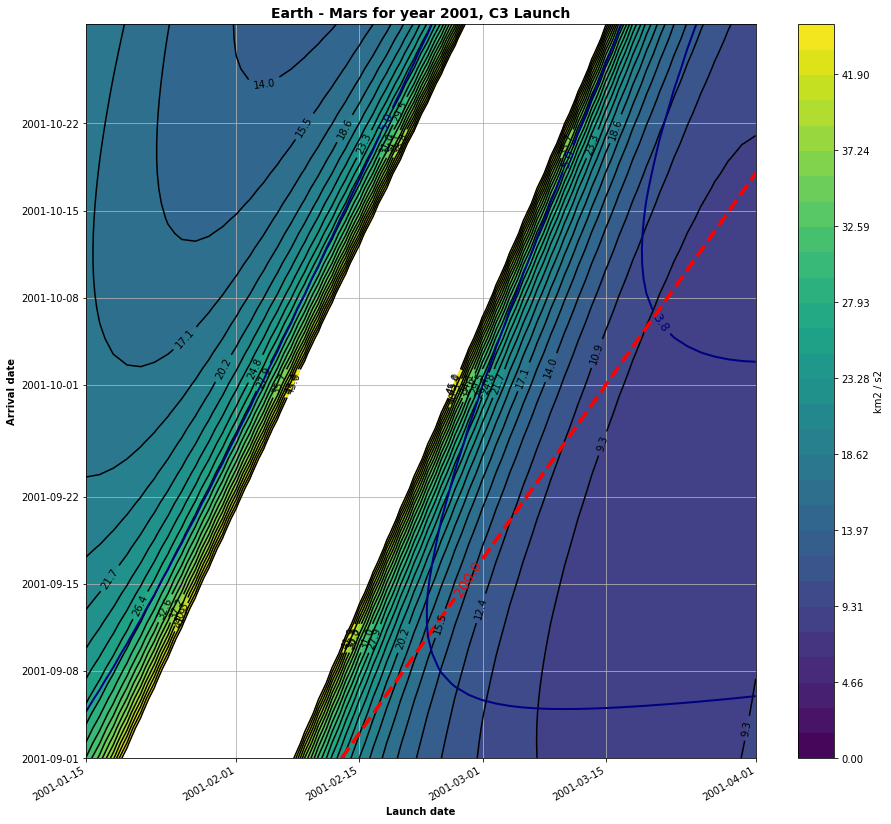

In [64]:
dv_dpt, dv_arr, c3dpt, c3arr, tof = porkchop(Earth, Mars,
                                             launch_span, arrival_span)

<h3>Function to calculate various lines of apsides for part A</h3>

In [11]:
#function to calculate orbital elements of transfer orbit
def runner(Le, Lm, L_A, r1, r2, s_u):
    theta_1 = Le-L_A #true anomaly angle
    theta_2 = Lm-L_A
    e = (r2-r1)/((r1*math.cos(math.radians(theta_1))-(r2*math.cos(math.radians(theta_2))))) #eccentricity
    #e = abs(e) # not sure about this
    Rp = (r1*(1+e*math.cos(math.radians(theta_1))))/(1+e) #pariapsis radius
    a = Rp/(1-e)
    Ra = a*(1+e)
    n = math.sqrt(s_u/a**3)
    T_R_1 = math.radians(theta_1) #convert to radians
    T_R_2 = math.radians(theta_2) #convert to radians
    E_e = math.acos((e+math.cos(T_R_1))/(1+e*math.cos(T_R_1))) #Eccentric anomaly of earth - use radians!!!
    E_m = math.acos((e+math.cos(T_R_2))/(1+e*math.cos(T_R_2))) #Eccentric anomaly of mars -use radians!!!
    t_e = ((E_e-e*math.sin(E_e))/n) #Time since periapsis earth (radians)
    t_m = ((E_m-e*math.sin(E_m))/n) #Time since periapsis mars (radians)
    t_t = t_m-t_e
    print(i,"Time delta (days): ", t_t/60/60/24)

In [12]:
Le = 181.444 #earth longitude at launch
Lm = 333.221 #mars longitude at launch
L_A = 0 #Arbitrary line of apsides for testing purposes
r1 = 149905909.7 #earth radius(units - Km)
r2 = 206671197  #mars radius (units - Km)
s_u = 132712439935.5 #standard gravitaional parameter of the sun
deg = 360

lists = []
for i in range(1,deg+1):
    try:
        runner(Le, Lm, i, r1, r2, s_u)
        lists.append(i)
    except:
        pass

1 Time delta (days):  -190.8671848198035
2 Time delta (days):  -189.19615351544314
3 Time delta (days):  -186.68906695746273
4 Time delta (days):  -184.18119429828764
5 Time delta (days):  -181.67250276210493
6 Time delta (days):  -179.1629613771527
7 Time delta (days):  -176.65254084753292
8 Time delta (days):  -174.14121343363024
9 Time delta (days):  -171.62895284045445
10 Time delta (days):  -169.11573411326512
11 Time delta (days):  -166.60153353989588
12 Time delta (days):  -164.08632855923517
13 Time delta (days):  -161.570097675364
14 Time delta (days):  -159.05282037688605
15 Time delta (days):  -156.53447706101483
16 Time delta (days):  -154.01504896201695
17 Time delta (days):  -151.49451808362832
18 Time delta (days):  -148.97286713508876
19 Time delta (days):  -146.45007947045454
20 Time delta (days):  -143.92613903086684
21 Time delta (days):  -141.4010302894637
22 Time delta (days):  -138.87473819863746
23 Time delta (days):  -136.3472481393416
24 Time delta (days):  -13

337 Time delta (days):  -206.17614777928836
338 Time delta (days):  -205.48909958152373
339 Time delta (days):  -204.80969879446317
340 Time delta (days):  -204.1374123482914
341 Time delta (days):  -203.4717268208202
342 Time delta (days):  -202.8121467540728
343 Time delta (days):  -202.15819307842185
344 Time delta (days):  -201.50940163313533
345 Time delta (days):  -200.8653217731863
346 Time delta (days):  -200.2255150530618
347 Time delta (days):  -199.58955397907565
348 Time delta (days):  -198.9570208223612
349 Time delta (days):  -198.32750648531012
350 Time delta (days):  -197.70060941473113
351 Time delta (days):  -197.0759345554387
352 Time delta (days):  -196.45309233836292
353 Time delta (days):  -195.83169769758362
354 Time delta (days):  -195.21136911095672
355 Time delta (days):  -194.59172765921366
356 Time delta (days):  -193.9723960985825
357 Time delta (days):  -193.3529979420944
358 Time delta (days):  -192.7331565448239
359 Time delta (days):  -192.1124941883399